## Learning to Classify Text: Supervised Classification

For this lesson, we will focus on how to build our first automatic classification algorithms. Since the topic is huge, we will be simply scratching the surface, to get something working. For those interested in learning more, taking the Data Mining course next semester is the natural sequence.

Classification is the task of choosing the correct class label for a given input. In basic classification tasks, each input is considered in isolation from all other inputs, and the set of labels is defined in advance. Some examples of classification tasks are:

* Deciding whether an email is spam or not.
* Deciding what the topic of a news article is, from a fixed list of topic areas such as "sports," "technology," and "politics."
* Deciding whether a given occurrence of the word bank is used to refer to a river bank, a financial institution, the act of tilting to the side, or the act of depositing something in a financial institution.

A classifier is called supervised if it is built based on **training data** containing the correct label for each input. 

<img src="http://www.nltk.org/images/supervised-classification.png" width="50%">

(a) During training, we have a set of input cases, for which we know their correct label. Then we take each input and we extract a set of _features_, which capture the basic information about each input. Pairs of feature sets and labels are fed into the machine learning algorithm to generate a model. 

(b) During prediction, we need to classify input for which we do not have the correct label. For that, we extract the  same set of features from the input. we feed these features into the model, which generates predicted labels.


#### Gender Identification

Earlier, we have seen how we can generate frequency distribution (`FreqDist`) objects from texts (or collection of texts), and we discussed how such information can be used for identification of important words in a text.

Let's see how we can use these frequency distributions for our first task: Identify the gender of a name.

One more wordlist corpus is the Names corpus, containing 8,000 first names categorized by gender. The male and female names are stored in separate files. Let's find names which appear in both files, i.e. names that are ambiguous for gender:

In [1]:
import nltk

names = nltk.corpus.names
names.fileids()

[u'female.txt', u'male.txt']

In [2]:
male_names = names.words('male.txt')
print len(male_names)
print(male_names)

2943
[u'Aamir', u'Aaron', u'Abbey', u'Abbie', u'Abbot', u'Abbott', u'Abby', u'Abdel', u'Abdul', u'Abdulkarim', u'Abdullah', u'Abe', u'Abel', u'Abelard', u'Abner', u'Abraham', u'Abram', u'Ace', u'Adair', u'Adam', u'Adams', u'Addie', u'Adger', u'Aditya', u'Adlai', u'Adnan', u'Adolf', u'Adolfo', u'Adolph', u'Adolphe', u'Adolpho', u'Adolphus', u'Adrian', u'Adrick', u'Adrien', u'Agamemnon', u'Aguinaldo', u'Aguste', u'Agustin', u'Aharon', u'Ahmad', u'Ahmed', u'Ahmet', u'Ajai', u'Ajay', u'Al', u'Alaa', u'Alain', u'Alan', u'Alasdair', u'Alastair', u'Albatros', u'Albert', u'Alberto', u'Albrecht', u'Alden', u'Aldis', u'Aldo', u'Aldric', u'Aldrich', u'Aldus', u'Aldwin', u'Alec', u'Aleck', u'Alejandro', u'Aleks', u'Aleksandrs', u'Alessandro', u'Alex', u'Alexander', u'Alexei', u'Alexis', u'Alf', u'Alfie', u'Alfonse', u'Alfonso', u'Alfonzo', u'Alford', u'Alfred', u'Alfredo', u'Algernon', u'Ali', u'Alic', u'Alister', u'Alix', u'Allah', u'Allan', u'Allen', u'Alley', u'Allie', u'Allin', u'Allyn', u'Alo

In [3]:
female_names = names.words('female.txt')
print len(female_names)
print female_names

5001
[u'Abagael', u'Abagail', u'Abbe', u'Abbey', u'Abbi', u'Abbie', u'Abby', u'Abigael', u'Abigail', u'Abigale', u'Abra', u'Acacia', u'Ada', u'Adah', u'Adaline', u'Adara', u'Addie', u'Addis', u'Adel', u'Adela', u'Adelaide', u'Adele', u'Adelice', u'Adelina', u'Adelind', u'Adeline', u'Adella', u'Adelle', u'Adena', u'Adey', u'Adi', u'Adiana', u'Adina', u'Adora', u'Adore', u'Adoree', u'Adorne', u'Adrea', u'Adria', u'Adriaens', u'Adrian', u'Adriana', u'Adriane', u'Adrianna', u'Adrianne', u'Adrien', u'Adriena', u'Adrienne', u'Aeriel', u'Aeriela', u'Aeriell', u'Ag', u'Agace', u'Agata', u'Agatha', u'Agathe', u'Aggi', u'Aggie', u'Aggy', u'Agna', u'Agnella', u'Agnes', u'Agnese', u'Agnesse', u'Agneta', u'Agnola', u'Agretha', u'Aida', u'Aidan', u'Aigneis', u'Aila', u'Aile', u'Ailee', u'Aileen', u'Ailene', u'Ailey', u'Aili', u'Ailina', u'Ailyn', u'Aime', u'Aimee', u'Aimil', u'Aina', u'Aindrea', u'Ainslee', u'Ainsley', u'Ainslie', u'Ajay', u'Alaine', u'Alameda', u'Alana', u'Alanah', u'Alane', u'Alan

Now, we need to create our training data. For that, we will create a set of tuples, with the *label* for the name and the actual name:

In [4]:
data = []
data += [("female", name) for name in female_names] 
data += [("male", name) for name in male_names]

In [5]:
data[:5]

[('female', u'Abagael'),
 ('female', u'Abagail'),
 ('female', u'Abbe'),
 ('female', u'Abbey'),
 ('female', u'Abbi')]

In [6]:
data[-5:]

[('male', u'Zeus'),
 ('male', u'Zippy'),
 ('male', u'Zollie'),
 ('male', u'Zolly'),
 ('male', u'Zorro')]

Now, we can build our first rudimentary classifier: We lookup a name in the list, and return the gender in the label.

In [7]:
def classify_name(input_name):
    for (label, name) in data:
        if name == input_name:
            print label;

Let's try now our classifier for a few different inputs:

In [8]:
input_name = "John"
print "Trying ", input_name
classify_name(input_name)

Trying  John
male


In [9]:
input_name = "Jane"
print "Trying ", input_name
classify_name(input_name)

Trying  Jane
female


In [10]:
input_name = "Leslie"
print "Trying ", input_name
classify_name(input_name)

Trying  Leslie
female
male


In [11]:
input_name = "Panos"
print "Trying ", input_name
classify_name(input_name)

Trying  Panos


Apparently, our classifier has a few problems. Cannot handle at all names that are not in the training data, and has problems when the names appear in both lists. Let's see how many such names there are:

In [12]:
m = set(male_names)
f= set(female_names)
ambiguous = [w for w in m if w in f]
print len(ambiguous)
print ambiguous

365
[u'Casey', u'Chrissy', u'Sandy', u'Claude', u'Christie', u'Eddy', u'Angie', u'Dominique', u'Shea', u'Bennie', u'Ginger', u'Shannon', u'Merle', u'Clair', u'Lin', u'Jerry', u'Dell', u'Jordan', u'Gretchen', u'Juanita', u'Meade', u'Ali', u'Matty', u'Randie', u'Quinn', u'Willy', u'Brook', u'Gabriell', u'Tallie', u'Kelsey', u'Dory', u'Drew', u'Bobby', u'Perry', u'Saundra', u'Aubrey', u'Chad', u'Tammie', u'Cammy', u'Barrie', u'Gene', u'Maxie', u'Carroll', u'Cody', u'Sayre', u'Geri', u'Maddie', u'Holly', u'Theo', u'Christian', u'Devon', u'Lynn', u'Luce', u'Mead', u'Leland', u'Bernie', u'Andie', u'Daffy', u'Carey', u'Tracie', u'Carmine', u'Daryl', u'Fred', u'Isadore', u'Glen', u'Pen', u'Sydney', u'Karel', u'Kerry', u'Bertie', u'Georgia', u'Shaine', u'Nat', u'Courtney', u'Ike', u'Tracey', u'Sonny', u'Gay', u'Gabriel', u'Michele', u'Donnie', u'Scotty', u'Lyn', u'Winny', u'Hilary', u'Tim', u'Mickie', u'Chris', u'Abby', u'Marlo', u'Corey', u'Valentine', u'Meryl', u'Dallas', u'Haleigh', u'Germai

One way to improve our classifier is to use a bigger dataset, or count the actual frequency of each name in female and male versions, instead of having just a list. However, none of these solve the underlying problem that the classifier cannot extend beyond the training data.

### Featurization

Featurization is a process in which we represent an input using a set of values, that are derived from the input. 

For example, for gender identification, the last character of the name can give hints about the gender. For example, it is well known that names ending in the letter `a` are almost always female. 

Let's create a revised data set

In [13]:
last_char_data = [(label, name[-1]) for (label, name) in data]
last_char_data[:10]

[('female', u'l'),
 ('female', u'l'),
 ('female', u'e'),
 ('female', u'y'),
 ('female', u'i'),
 ('female', u'e'),
 ('female', u'y'),
 ('female', u'l'),
 ('female', u'l'),
 ('female', u'e')]

In [14]:
last_char_data[-10:]

[('male', u'd'),
 ('male', u'h'),
 ('male', u'e'),
 ('male', u'g'),
 ('male', u'k'),
 ('male', u's'),
 ('male', u'y'),
 ('male', u'e'),
 ('male', u'y'),
 ('male', u'o')]

Now, we can use the concept of **conditional** frequency distribution, to compare the frequencies of each feature in the two classes:

In [15]:
cfd = nltk.ConditionalFreqDist(last_char_data)

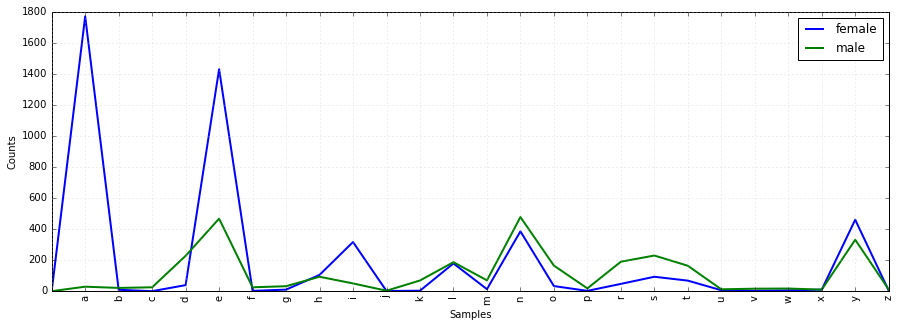

In [16]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

cfd.plot()

This plot shows the number of female and male names ending with each letter of the alphabet; most names ending with a, e or i are female; names ending in h and l are ambiguous and can both male and female; names ending in k, o, r, s, and t are more likely to be male.

Let's build a classifier to model these differences more precisely.

The first step in creating a classifier is deciding what features of the input are relevant, and how to encode those features. For this example, we'll start by just looking at the final letter of a given name. The following feature extractor function builds a dictionary containing relevant information about a given name:

In [17]:
def gender_features(word):
     return {
        'last_letter': word[-1]
    }

gender_features('Shrek')

{'last_letter': 'k'}

Of course, we can add more features if we want. (But beware, as this is not always better, as we will see later.)

In [18]:
def gender_features(word):
     return {
        'last_letter': word[-1],
        'first_letter': word[0],
        'penultimate_letter': word[-2],
        'last_two_letters': word[-2:]
    }

gender_features('Shrek')

{'first_letter': 'S',
 'last_letter': 'k',
 'last_two_letters': 'ek',
 'penultimate_letter': 'e'}

The returned dictionary, known as a feature set, maps from features' names to their values. Feature names are case-sensitive strings that typically provide a short human-readable description of the feature. Feature values are values with simple types, such as booleans, numbers, and strings.

Now that we've defined a feature extractor, we need to prepare a list of examples and corresponding class labels.

In [19]:
from nltk.corpus import names

def gender_features(word):
     return {
        'last_letter': word[-1],
        'first_letter': word[0],
    }

male_names = names.words('male.txt')
female_names = names.words('female.txt')

labeled_names = []
labeled_names += [("female", name) for name in female_names] 
labeled_names += [("male", name) for name in male_names]

labeled_featuresets = [(gender_features(name), gender) for (gender, name) in labeled_names]

In [20]:
labeled_featuresets[-5:]

[({'first_letter': u'Z', 'last_letter': u's'}, 'male'),
 ({'first_letter': u'Z', 'last_letter': u'y'}, 'male'),
 ({'first_letter': u'Z', 'last_letter': u'e'}, 'male'),
 ({'first_letter': u'Z', 'last_letter': u'y'}, 'male'),
 ({'first_letter': u'Z', 'last_letter': u'o'}, 'male')]

In [21]:
# We want to randomize the order, before separating into training and test set
import random
random.shuffle(labeled_featuresets)

In [22]:
labeled_featuresets

[({'first_letter': u'F', 'last_letter': u'e'}, 'female'),
 ({'first_letter': u'B', 'last_letter': u'y'}, 'male'),
 ({'first_letter': u'C', 'last_letter': u'a'}, 'female'),
 ({'first_letter': u'T', 'last_letter': u'e'}, 'male'),
 ({'first_letter': u'A', 'last_letter': u'e'}, 'female'),
 ({'first_letter': u'C', 'last_letter': u'a'}, 'female'),
 ({'first_letter': u'L', 'last_letter': u'a'}, 'female'),
 ({'first_letter': u'H', 'last_letter': u'n'}, 'male'),
 ({'first_letter': u'F', 'last_letter': u'n'}, 'male'),
 ({'first_letter': u'C', 'last_letter': u'a'}, 'female'),
 ({'first_letter': u'V', 'last_letter': u't'}, 'male'),
 ({'first_letter': u'U', 'last_letter': u'l'}, 'male'),
 ({'first_letter': u'N', 'last_letter': u'a'}, 'female'),
 ({'first_letter': u'D', 'last_letter': u'l'}, 'male'),
 ({'first_letter': u'H', 'last_letter': u'e'}, 'male'),
 ({'first_letter': u'G', 'last_letter': u's'}, 'male'),
 ({'first_letter': u'J', 'last_letter': u'm'}, 'male'),
 ({'first_letter': u'J', 'last_let

In [23]:
len(labeled_featuresets)

7944

Next, we divide the resulting list of feature sets into a **training set** and a **test set**. The training set is used to train our classifier. The test set will **not** be used for training but only for evaluating the performance of our classifier for "unseen" data that have not been present in the training data.

In [24]:
# We will keep 500 examples for testing and the remaining ones will be training
train_set, test_set = labeled_featuresets[500:], labeled_featuresets[:500]

Now that we have our data ready, let's build our classifier. We will use a "Naive Bayes" classifier. We are not going to talk about the underlying mathematical details of the classification model, and instead will treat as a black box. Covering how the NB classifier works, its strengths and weaknesses, and learning about alternative classification models (e.g., decision trees, logistic regression, support vector machines, etc) is the topic of the Data Mining class.

In [25]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

Let's just test it out on some names that did not appear in its training data:

In [26]:
classifier.classify(gender_features('Neo'))

'male'

In [27]:
classifier.classify(gender_features('Trinity'))

'male'

Observe that these character names from The Matrix are correctly classified. Although this science fiction movie is set in 2199, it still conforms with our expectations about names and genders. 

Let's check a few more:

In [28]:
smalltest = {"Simona", "Adam", "Sidney", "Phillip", "Won Jun", "Hannah", "Panos", "Marios", "Jonathan", "Zhangshuai", 
 "John", "Sherif", "Junghoon", "Zhongling", "Raffi", "Casey", "Alexander" }

for name in smalltest:
    features = gender_features(name)
    print "Name: ", name, " ==> ", classifier.classify(features)
    

Name:  Raffi  ==>  female
Name:  Jonathan  ==>  male
Name:  Sidney  ==>  female
Name:  Zhangshuai  ==>  female
Name:  Hannah  ==>  male
Name:  Marios  ==>  male
Name:  Sherif  ==>  male
Name:  Adam  ==>  male
Name:  Casey  ==>  female
Name:  Simona  ==>  female
Name:  Panos  ==>  male
Name:  Phillip  ==>  male
Name:  Won Jun  ==>  male
Name:  Zhongling  ==>  male
Name:  John  ==>  male
Name:  Junghoon  ==>  male
Name:  Alexander  ==>  male


We can systematically evaluate the classifier on a much larger quantity of unseen data:

In [29]:
print(nltk.classify.accuracy(classifier, test_set))

0.774


Finally, we can examine the classifier to determine which features it found most effective for distinguishing the names' genders:

In [30]:
classifier.show_most_informative_features(26)

Most Informative Features
             last_letter = u'a'           female : male   =     39.0 : 1.0
             last_letter = u'k'             male : female =     31.2 : 1.0
             last_letter = u'f'             male : female =     15.9 : 1.0
             last_letter = u'p'             male : female =     12.5 : 1.0
             last_letter = u'v'             male : female =     11.2 : 1.0
             last_letter = u'd'             male : female =      9.8 : 1.0
             last_letter = u'o'             male : female =      9.4 : 1.0
             last_letter = u'm'             male : female =      8.5 : 1.0
             last_letter = u'r'             male : female =      6.7 : 1.0
             last_letter = u'w'             male : female =      6.6 : 1.0
             last_letter = u'g'             male : female =      5.4 : 1.0
            first_letter = u'W'             male : female =      5.0 : 1.0
             last_letter = u's'             male : female =      4.2 : 1.0

#### Exercise 

Modify the gender_features() function to provide the classifier with features encoding the length of the name, its first letter, and any other features that seem like they might be informative. Retrain the classifier with these new features, and test its accuracy.

In [31]:
# your code here
from nltk.corpus import names
import random

# Modify this function to add more features
def gender_features(word):
    return {
        'last_letter': word[-1],
    }

male_names = names.words('male.txt')
female_names = names.words('female.txt')

labeled_names = []
labeled_names += [("female", name) for name in female_names] 
labeled_names += [("male", name) for name in male_names]

labeled_featuresets = [(gender_features(name), gender) for (gender, name) in labeled_names]

# We are going to repeat the process multiple times, as the shuffling generates different 
# sets of training and test data
train_set, test_set = [], []
trials = 50
psum = 0;
cnt = 0;
for i in range(trials):
    random.shuffle(labeled_featuresets)
    # We will keep 500 examples for testing and the remaining ones will be training
    train_set, test_set = labeled_featuresets[500:], labeled_featuresets[:500]
    classifier = nltk.NaiveBayesClassifier.train(train_set)
    accuracy = nltk.classify.accuracy(classifier, test_set)
    print("Trial:", cnt, " Accuracy:", accuracy)
    psum += accuracy
    cnt += 1
    
print "Avg Accuracy: ", (psum/cnt)

('Trial:', 0, ' Accuracy:', 0.782)
('Trial:', 1, ' Accuracy:', 0.86)
('Trial:', 2, ' Accuracy:', 0.816)
('Trial:', 3, ' Accuracy:', 0.842)
('Trial:', 4, ' Accuracy:', 0.874)
('Trial:', 5, ' Accuracy:', 0.838)
('Trial:', 6, ' Accuracy:', 0.856)
('Trial:', 7, ' Accuracy:', 0.822)
('Trial:', 8, ' Accuracy:', 0.834)
('Trial:', 9, ' Accuracy:', 0.848)
('Trial:', 10, ' Accuracy:', 0.826)
('Trial:', 11, ' Accuracy:', 0.824)
('Trial:', 12, ' Accuracy:', 0.842)
('Trial:', 13, ' Accuracy:', 0.832)
('Trial:', 14, ' Accuracy:', 0.82)
('Trial:', 15, ' Accuracy:', 0.848)
('Trial:', 16, ' Accuracy:', 0.81)
('Trial:', 17, ' Accuracy:', 0.838)
('Trial:', 18, ' Accuracy:', 0.8)
('Trial:', 19, ' Accuracy:', 0.818)
('Trial:', 20, ' Accuracy:', 0.814)
('Trial:', 21, ' Accuracy:', 0.81)
('Trial:', 22, ' Accuracy:', 0.846)
('Trial:', 23, ' Accuracy:', 0.85)
('Trial:', 24, ' Accuracy:', 0.856)
('Trial:', 25, ' Accuracy:', 0.796)
('Trial:', 26, ' Accuracy:', 0.832)
('Trial:', 27, ' Accuracy:', 0.83)
('Trial:',

In [32]:
classifier.show_most_informative_features(100)

Most Informative Features
        last_two_letters = u'na'          female : male   =    165.2 : 1.0
        last_two_letters = u'la'          female : male   =     76.9 : 1.0
        last_two_letters = u'ia'          female : male   =     40.2 : 1.0
        last_two_letters = u'sa'          female : male   =     35.8 : 1.0
             last_letter = u'a'           female : male   =     34.7 : 1.0
             last_letter = u'k'             male : female =     32.3 : 1.0
        last_two_letters = u'us'            male : female =     28.8 : 1.0
        last_two_letters = u'do'            male : female =     27.3 : 1.0
        last_two_letters = u'ra'          female : male   =     27.0 : 1.0
        last_two_letters = u'ta'          female : male   =     25.8 : 1.0
        last_two_letters = u'ld'            male : female =     24.4 : 1.0
        last_two_letters = u'rd'            male : female =     23.9 : 1.0
        last_two_letters = u'rt'            male : female =     22.2 : 1.0

**"Big" data note**: When working with large data sets, constructing a single list that contains the features of _every_ instance can use up a large amount of memory. In these cases, use the function `nltk.classify.apply_features`, which returns an object that acts like a list but does not store all the feature sets in memory:

In [33]:
from nltk.classify import apply_features
random.shuffle(labeled_names)
train_set = apply_features(gender_features, labeled_names[500:])
test_set = apply_features(gender_features, labeled_names[:500])

### Choosing the right features

Selecting relevant features and deciding how to encode them for a learning method can have an enormous impact on the learning method's ability to extract a good model. Much of the interesting work in building a classifier is deciding what features might be relevant, and how we can represent them. Although it's often possible to get decent performance by using a fairly simple and obvious set of features, there are usually significant gains to be had by using carefully constructed features based on a thorough understanding of the task at hand.

Typically, feature extractors are built through a process of trial-and-error, guided by intuitions about what information is relevant to the problem. It's common to start with a "kitchen sink" approach, including all the features that you can think of, and then checking to see which features actually are helpful.

In [34]:
def gender_features_expanded(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

print gender_features_expanded('Panos')

{'count(u)': 0, 'has(d)': False, 'count(b)': 0, 'count(w)': 0, 'has(b)': False, 'count(l)': 0, 'count(q)': 0, 'count(n)': 1, 'has(j)': False, 'count(s)': 1, 'count(h)': 0, 'has(h)': False, 'has(y)': False, 'count(j)': 0, 'has(f)': False, 'has(o)': True, 'count(x)': 0, 'has(m)': False, 'count(z)': 0, 'has(k)': False, 'has(u)': False, 'count(d)': 0, 'has(s)': True, 'count(m)': 0, 'count(f)': 0, 'has(q)': False, 'has(w)': False, 'has(e)': False, 'has(z)': False, 'count(t)': 0, 'count(c)': 0, 'has(c)': False, 'has(x)': False, 'count(v)': 0, 'has(a)': True, 'last_letter': 's', 'has(v)': False, 'count(p)': 1, 'count(o)': 1, 'first_letter': 'p', 'has(i)': False, 'count(i)': 0, 'has(r)': False, 'has(g)': False, 'count(k)': 0, 'count(y)': 0, 'has(n)': True, 'has(l)': False, 'count(e)': 0, 'has(t)': False, 'count(g)': 0, 'count(r)': 0, 'count(a)': 1, 'has(p)': True}


However, there are usually limits to the number of features that you should use with a given learning algorithm — if we provide too many features, then the algorithm will have a higher chance of relying on idiosyncrasies of your training data that don't generalize well to new examples. This problem is known as **overfitting**, and can be especially problematic when working with small training sets. 

For example, if we train a naive Bayes classifier using the feature extractor shown in 1.2, it will overfit relatively small training set, resulting in a system whose accuracy is lower than the accuracy of a classifier that only pays attention to the final letter of each name:

In [35]:
random.shuffle(labeled_names)
featuresets = [(gender_features_expanded(n), gender) for (gender, n) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
train_names, test_names = labeled_names[500:], labeled_names[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(20)

0.768
Most Informative Features
             last_letter = u'a'           female : male   =     34.5 : 1.0
             last_letter = u'k'             male : female =     31.1 : 1.0
             last_letter = u'f'             male : female =     17.2 : 1.0
             last_letter = u'p'             male : female =     12.5 : 1.0
             last_letter = u'v'             male : female =      9.8 : 1.0
                count(v) = 2              female : male   =      9.7 : 1.0
             last_letter = u'm'             male : female =      9.6 : 1.0
             last_letter = u'd'             male : female =      9.2 : 1.0
             last_letter = u'o'             male : female =      8.1 : 1.0
             last_letter = u'r'             male : female =      7.2 : 1.0
             last_letter = u'w'             male : female =      6.2 : 1.0
            first_letter = u'w'             male : female =      5.1 : 1.0
                count(w) = 2                male : female =      5.1

So, let's keep our original classifier

In [36]:
random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (gender, n) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
train_names, test_names = labeled_names[500:], labeled_names[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.818


We can generate a list of the errors that the classifier makes when predicting name genders:

In [37]:
errors = []
for (correct, name) in test_names:
    guess = classifier.classify(gender_features(name))
    if correct != guess:
        errors.append( (correct, guess, name) )

In [38]:
len(errors)

91

In [39]:
errors

[('female', 'male', u'Wandis'),
 ('female', 'male', u'Ingaborg'),
 ('female', 'male', u'Mead'),
 ('male', 'female', u'Neil'),
 ('male', 'female', u'Vasili'),
 ('male', 'female', u'Elmore'),
 ('male', 'female', u'Dory'),
 ('female', 'male', u'Eileen'),
 ('female', 'male', u'Trish'),
 ('male', 'female', u'Micah'),
 ('female', 'male', u'Rayshell'),
 ('male', 'female', u'Cammy'),
 ('male', 'female', u'Ritchie'),
 ('male', 'female', u'Blare'),
 ('male', 'female', u'Jessee'),
 ('female', 'male', u'Lark'),
 ('female', 'male', u'Hesther'),
 ('female', 'male', u'Edy'),
 ('male', 'female', u'Lonnie'),
 ('male', 'female', u'Gustave'),
 ('female', 'male', u'Mag'),
 ('female', 'male', u'Aggy'),
 ('female', 'male', u'Torey'),
 ('female', 'male', u'Cloe'),
 ('male', 'female', u'Scarface'),
 ('female', 'male', u'Charmion'),
 ('female', 'male', u'Halley'),
 ('female', 'male', u'Shelley'),
 ('female', 'male', u'Ruby'),
 ('male', 'female', u'Demetre'),
 ('male', 'female', u'Sasha'),
 ('male', 'female', u

#### Confusion Matrix

If we want to learn more about the specific types of errors for our classifier, we can create a "confusion matrix". A confusion matrix shows the number of times that a classifier classifies a specific instance into a particular class (E.g., males as males, males as females, etc).

In [40]:
gold = [gender for (features,gender) in test_set]

In [41]:
guess = [classifier.classify(features) for (features, gender) in test_set]

In [42]:
gold = [gender for (features,gender) in test_set]
guess = [classifier.classify(features) for (features, gender) in test_set]

cm = nltk.ConfusionMatrix(gold, guess)

In [43]:
print(cm.pp(sort_by_count=True, show_percents=False))

AttributeError: 'ConfusionMatrix' object has no attribute 'pp'

In [ ]:
print(cm.pp(sort_by_count=True, show_percents=True))

We can then examine individual error cases where the model predicted the wrong label, and try to determine what additional pieces of information would allow it to make the right decision (or which existing pieces of information are tricking it into making the wrong decision). The feature set can then be adjusted accordingly. The names classifier that we have built generates about 100 errors on the test corpus:

In [ ]:
for (correct, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (correct, guess, name))

Looking through this list of errors makes it clear that some suffixes that are more than one letter can be indicative of name genders. For example, names ending in yn appear to be predominantly female, despite the fact that names ending in n tend to be male; and names ending in ch are usually male, even though names that end in h tend to be female. We therefore adjust our feature extractor to include features for two-letter suffixes:

In [ ]:
def gender_features(word):
    return {'last_letter': word[-1:],
           'last_two_letters': word[-2:]}

random.shuffle(labeled_names)
featuresets = [(gender_features(n), gender) for (gender, n) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
train_names, test_names = labeled_names[500:], labeled_names[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

This error analysis procedure can then be repeated, checking for patterns in the errors that are made by the newly improved classifier. Each time the error analysis procedure is repeated, we should select a different test/training split, to ensure that the classifier does not start to reflect idiosyncrasies in the test set.

### Document Classification

A common classification task is to classify documents into categories. Let's use for this the Movie Reviews corpus from NLTK:

In [ ]:
from nltk.corpus import movie_reviews

categories = movie_reviews.categories()
categories

Now let's generate the list of files, each with its corresponding category.

In [ ]:
labeled_files = []
for category in categories:
    labeled_files += [(fileid, category) for fileid in movie_reviews.fileids(category)]

In [ ]:
labeled_files[:5]

In [ ]:
labeled_files[-5:]

In [ ]:
len(labeled_files)

In [ ]:
len([l for l in labeled_files if l[1]=='pos'])

In [ ]:
len([l for l in labeled_files if l[1]=='neg'])

Now let's create the features. We will create one feature per word, with a binary value, indicating whether the document contains the word or not. To limit the number of features that the classifier needs to process, we begin by constructing a list of the 2000 most frequent words in the overall corpus

In [ ]:
import nltk

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words() if w.isalpha())
word_features = [w for (w,f) in all_words.most_common(2000)]

def document_features(fileid):
    document_words = set(movie_reviews.words(fileid))
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word.lower() in document_words)
    return features

In [ ]:
%timeit  document_features("pos/cv995_21821.txt")

In [ ]:
document_features("pos/cv995_21821.txt")

You can see from the result above that the extraction of features from each document can take 10-30 msecs each. So for our dataset of 2000 documents, we can expect a feature extraction time of 20-60 seconds. We will use the "apply_features" trick (see above) to avoid doing all the work before actually having to train the classifier.

In [ ]:
from nltk.classify import apply_features
random.shuffle(labeled_files)
train_set = apply_features(document_features, labeled_files[100:])
test_set = apply_features(document_features, labeled_files[:100])

In [ ]:
# Alternatively, to avoid using the "apply_features"
# labeled_documents = [(document_features(fileid), category) for (fileid, category) in labeled_files]
# train_set, test_set = labeled_documents[100:], labeled_documents[:100]

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [ ]:
print(nltk.classify.accuracy(classifier, test_set))

In [ ]:
classifier.show_most_informative_features(50)

In [ ]:
# depravity = [fileid for (fileid, category) in labeled_files \
#             if "depravity" in movie_reviews.words(fileid)]
# depravity

In [ ]:
# movie_reviews.raw('pos/cv929_16908.txt')

### Exercise

Try to come up with features that will improve the classifier that we discussed above. 

In [ ]:
# Modify the code below

import nltk
from nltk.classify import apply_features

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words() if w.isalpha())
word_features = [w for (w,f) in all_words.most_common(2000)]

def document_features(fileid):
    # Modify to add your own set of features
    document_words = set(movie_reviews.words(fileid))
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word.lower() in document_words)
    return features


random.shuffle(labeled_files)
train_set = apply_features(document_features, labeled_files[200:])
test_set = apply_features(document_features, labeled_files[:200])
classifier = nltk.NaiveBayesClassifier.train(train_set)
print "Accuracy:", nltk.classify.accuracy(classifier, test_set)
classifier.show_most_informative_features(20)

### Further example: Sentence Segmentation

Sentence segmentation can be viewed as a classification task for punctuation: whenever we encounter a symbol that could possibly end a sentence, such as a period or a question mark, we have to decide whether it terminates the preceding sentence.

The first step is to obtain some data that has already been segmented into sentences and convert it into a form that is suitable for extracting features:

In [ ]:
sents = nltk.corpus.treebank_raw.sents()
tokens = []
boundaries = set()
offset = 0
for sent in sents:
    tokens.extend(sent)
    offset += len(sent)
    boundaries.add(offset-1)

Here, tokens is a merged list of tokens from the individual sentences, and boundaries is a set containing the indexes of all sentence-boundary tokens. Next, we need to specify the features of the data that will be used in order to decide whether punctuation indicates a sentence-boundary:

In [ ]:
def punct_features(tokens, i):
    return {'next-word-capitalized': tokens[i+1][0].isupper(),
        'prev-word': tokens[i-1].lower(),
        'punct': tokens[i],
        'prev-word-is-one-char': len(tokens[i-1]) == 1}

Based on this feature extractor, we can create a list of labeled featuresets by selecting all the punctuation tokens, and tagging whether they are boundary tokens or not:

In [ ]:
featuresets = [(punct_features(tokens, i), (i in boundaries))
                for i in range(1, len(tokens)-1)
                if tokens[i] in '.?!']

Using these featuresets, we can train and evaluate a punctuation classifier:

In [ ]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

To use this classifier to perform sentence segmentation, we simply check each punctuation mark to see whether it's labeled as a boundary; and divide the list of words at the boundary marks. 

In [ ]:
def segment_sentences(words):
    start = 0
    sents = []
    for i, word in enumerate(words):
        if word in '.?!' and classifier.classify(punct_features(words, i)) == True:
            sents.append(words[start:i+1])
            start = i+1
    if start < len(words):
        sents.append(words[start:])
    return sents